In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error



In [7]:
X_train = pd.read_csv('preprocessed_data/X_train.csv')
X_test = pd.read_csv('preprocessed_data/X_test.csv')
y_train = pd.read_csv('preprocessed_data/y_train.csv')
y_test = pd.read_csv('preprocessed_data/y_test.csv')

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [17]:
X_train.shape

(137540, 261)

In [20]:
from sklearn.model_selection import cross_val_score 

In [23]:
total = list()

***Random Forest Regressor***

In [30]:
from sklearn.ensemble import RandomForestRegressor


rgr2= RandomForestRegressor()

scores = cross_val_score(rgr2,X_train,y_train,scoring='r2',cv=5)
print('Cross validation scores of 5 linear regressions:',scores)
print ('Mean cross validation train score: ',round(np.mean(scores),3))
print ('Standard deviation in cv scores: ',round(np.std(scores),3))
rgr2.fit(X_train,y_train)
print('Linear regression r2 score on the training data: ',round(rgr2.score(X_train,y_train),3))
print('Linear regression r2 score on the test data: ',round(rgr2.score(X_test,y_test),3))
y_pred = rgr2.predict(X_test)
lr_rmse = (mean_squared_error(y_test, y_pred,squared=False))
print('Root Mean Squared Error: ',round(lr_rmse,3))



Cross validation scores of 5 linear regressions: [0.7583066  0.77164466 0.76466726 0.76434875 0.76553803]
Mean cross validation train score:  0.765
Standard deviation in cv scores:  0.004
Linear regression r2 score on the training data:  0.927
Linear regression r2 score on the test data:  0.771
Root Mean Squared Error:  3408.439


In [36]:
total.append([round(np.mean(scores),3),round(np.std(scores),3),
             round(rgr2.score(X_train,y_train),3),round(rgr2.score(X_test,y_test),3),
            round(lr_rmse,3)])

In [39]:
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  1752.8283146642614


This is a fairly good model – we can account for 77% of the variance in our test data 

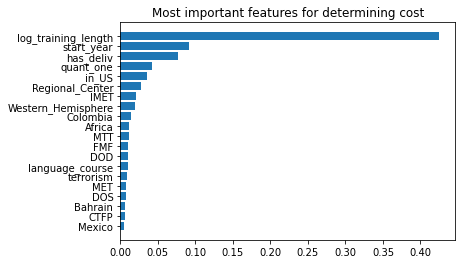

In [42]:
sorted_idx = rgr2.feature_importances_.argsort()[::-1][:20]


plt.barh(X_train.columns[sorted_idx][::-1], rgr2.feature_importances_[sorted_idx][::-1])
plt.title('Most important features for determining cost')
plt.show()

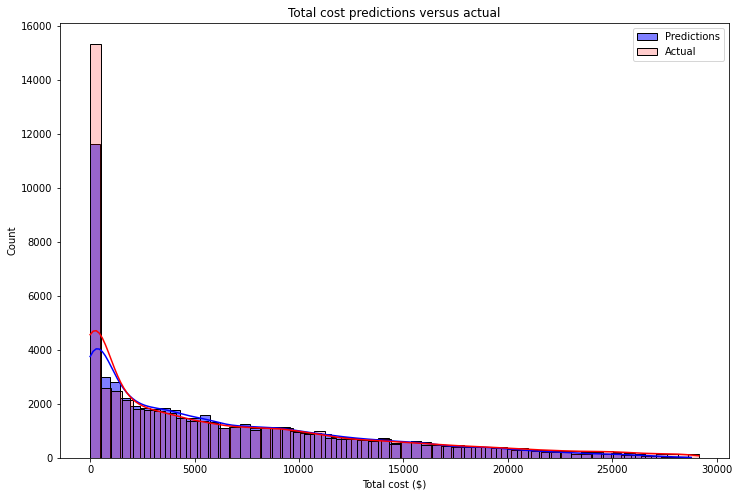

In [66]:
plt.figure(figsize=(12,8))
sns.histplot(y_pred,color='blue',kde=True,label='Predictions')
sns.histplot(y_test,alpha=0.2,color='red',kde=True,label='Actual')
plt.title('Total cost predictions versus actual')
plt.legend()
plt.xlabel('Total cost ($)')
plt.show()

***HistGradientBoosting Regressor***

In [68]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [70]:
hgb = HistGradientBoostingRegressor(loss="poisson")
scores = cross_val_score(hgb,X_train,y_train,scoring='r2',cv=5)
print('Cross validation scores of 5 linear regressions:',scores)
print ('Mean cross validation train score: ',round(np.mean(scores),3))
print ('Standard deviation in cv scores: ',round(np.std(scores),3))
hgb.fit(X_train,y_train)
print('Linear regression r2 score on the training data: ',round(hgb.score(X_train,y_train),3))
print('Linear regression r2 score on the test data: ',round(hgb.score(X_test,y_test),3))
y_pred = hgb.predict(X_test)
lr_rmse = (mean_squared_error(y_test, y_pred,squared=False))
print('Root Mean Squared Error: ',round(lr_rmse,3))

total.append([round(np.mean(scores),3),round(np.std(scores),3),
             round(hgb.score(X_train,y_train),3),round(hgb.score(X_test,y_test),3),
            round(lr_rmse,3)])

Cross validation scores of 5 linear regressions: [0.64936566 0.65539477 0.65446784 0.65098391 0.65713084]
Mean cross validation train score:  0.653
Standard deviation in cv scores:  0.003
Linear regression r2 score on the training data:  0.662
Linear regression r2 score on the test data:  0.659
Root Mean Squared Error:  4157.194


Random Forest Regression performs better.

***XGBoost***

In [74]:
from xgboost.sklearn import XGBRegressor

In [76]:
xgb = XGBRegressor(learning_rate=0.5,min_child_weight=5,n_estimators=500)
scores = cross_val_score(xgb,X_train,y_train,scoring='r2',cv=5)
print('Cross validation scores of 5 linear regressions:',scores)
print ('Mean cross validation train score: ',round(np.mean(scores),3))
print ('Standard deviation in cv scores: ',round(np.std(scores),3))
xgb.fit(X_train,y_train)
print('Linear regression r2 score on the training data: ',round(xgb.score(X_train,y_train),3))
print('Linear regression r2 score on the test data: ',round(xgb.score(X_test,y_test),3))
y_pred = xgb.predict(X_test)
lr_rmse = (mean_squared_error(y_test, y_pred,squared=False))
print('Root Mean Squared Error: ',round(lr_rmse,3))

total.append([round(np.mean(scores),3),round(np.std(scores),3),
             round(xgb.score(X_train,y_train),3),round(xgb.score(X_test,y_test),3),
            round(lr_rmse,3)])

Cross validation scores of 5 linear regressions: [0.73915817 0.74637629 0.74339057 0.73965268 0.74570607]
Mean cross validation train score:  0.743
Standard deviation in cv scores:  0.003
Linear regression r2 score on the training data:  0.823
Linear regression r2 score on the test data:  0.751
Root Mean Squared Error:  3553.726


Random Forest Regression still performs better.

***Comparison of Models***

In [79]:
total = pd.DataFrame(total)

In [87]:
total.index = ['Random Forest','Hist Gradient Boosting','XGBoost']

In [89]:
total.columns = ['Cross val r2 score','Cross val r2 std','Train score r2','Test score r2','RMSE']

In [90]:
total

,Cross val r2 score,Cross val r2 std,Train score r2,Test score r2,RMSE
Random Forest,0.765,0.004,0.927,0.771,3408.439
Hist Gradient Boosting,0.653,0.003,0.662,0.659,4157.194
XGBoost,0.743,0.003,0.823,0.751,3553.726


Random Forest Regression is clearly the best model for our data. It can explain 77% of the variation of the target variable in the testing data, and predicts price data with an average error of around $1750. 

It is more accurate for higher data – We can see that our predicted and actual distributions are practically identical for total costs above $2000. Almost all of the error in our model comes from extremely low costs – the model has trouble correctly predicting all of the 0 total cost operations, mistakenly predicting low cost values for these.


Our model can explain 77% of the variation in the training costs for test data with a RMSE of 3408. Using cross validation on training data it performs consistently at this level, with a mean r2 score of 0.765, with a standard deviation of 0.004. It performs excellently on the training data (r2 score of 0.927), but is not deeply overfitted – by decreasing max tree depth (currently unlimited), for example, we decrease training r2 score without increasing testing r2 score. In terms of real dollars, we can predict the cost of a foreign military training operation within an average error margin of $1752.83 using this model.
The data is fairly predictable based on a number of simple factors related to the location, program type, country that is readily available for unclassified data when programs are being discussed – though at this stage it may remain inaccessible for the average citizen, a policymaker or bureaucrat involved in budgetary processes would be empowered to easily understand and visualize real costs of proposed operations and thus better evaluate their utility and necessity.
